### 1) Dataset description

1. Time — time of the accident (In 24 hours format)

2. Day_of_week — A day when an accident occurred

3. Age_band_of_driver —The age group of the driver

4. Sex_of_driver — Gender of driver

5. Educational_level — Driver’s highest education level

6. Vehical_driver_relation — What’s the relation of a driver with the vehicle

7. Driving_experience — How many years of driving experience the driver has

8. Type_of_vehicle — What’s the type of vehicle

9. Owner_of_vehicle — Who’s the owner of the vehicle

10. Service_year_of_vehicle — The last service year of the vehicle

11. Defect_of_vehicle — Is there any defect on the vehicle or not?

12. 12Area_accident_occured — Locality of an accident site

13. Lanes_or_Medians — Are there any lanes or medians at the accident site?

14. Road_allignment — Road alignment with the terrain of the land

15. Types_of_junction — Type of junction at the accident site

16. Road_surface_type — A surface type of road

17. Road_surface_conditions — What was the condition of the road surface?

18. Light_conditions — Lighting conditions at the site

19. Weather_conditions — Weather situation at the site of an accident

20. Type_of_collision — What is the type of collision

21. Number_of_vehicles_involved — Total number of vehicles involved in an accident

22. Number_of_casualties — Total number of casualties in an accident

23. Vehicle_movement — How the vehicle was moving before the accident occurred

24. Casualty_class — A person who got killed during an accident

25. Sex_of_casualty — What the gender of a person who got killed

26. Age_band_of_casualty — Age group of casualty

27. Casualty_severtiy — How severely the casualty was injured

28. Work_of_casualty — What was the work of the casualty

29. Fitness_of_casualty — Fitness level of casualty

30. Pedestrain_movement — Was there any pedestrian movement on the road?

31. Cause_of-accident — What was the cause of an accident?

32. Accident_severity — How severe an accident was? (Target variable)

### 2) Loading the dataset

In [17]:
import pandas as pd

df=pd.read_csv('10 pipe dataset.csv')

In [18]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### 3) Data Preparation

We will start preprocessing our dataset by changing the "Time" column datatype to the daytime datatype.
We will then extract the hour of the day feature to prepare the data for modeling.

In [19]:
df.shape

(12316, 32)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### 4) Labeled Column

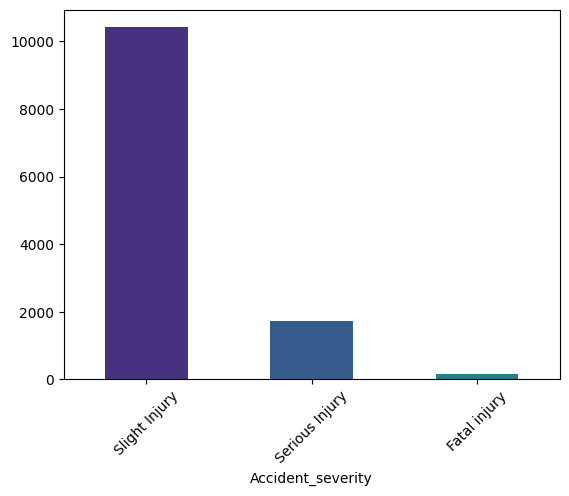

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

df['Accident_severity'].value_counts().plot(kind='bar', color=sn.color_palette('viridis'))

plt.xticks(rotation=45);

**As you can see, it's an imbalanced dataset, so we have to balance it.**

<Axes: xlabel='Educational_level'>

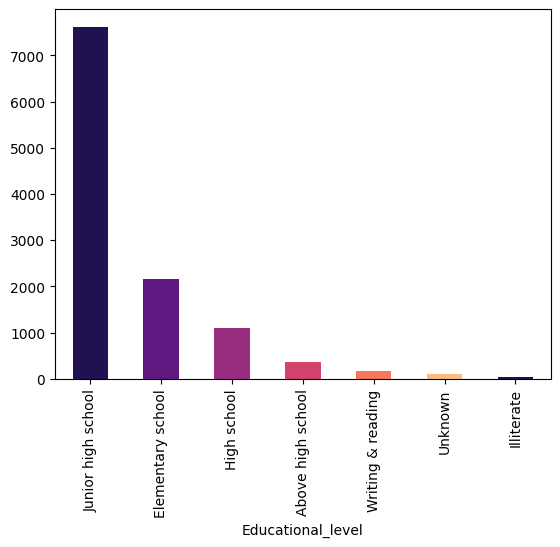

In [22]:
df['Educational_level'].value_counts().plot(kind='bar',color=sn.color_palette('magma'))

### 5) Dealing with Date-Time columns

In [23]:
type(df['Time'])

pandas.core.series.Series

In [24]:
df['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

In [25]:
df['Time']=pd.to_datetime(df['Time'])

C:\Users\NILABJA\AppData\Local\Temp\ipykernel_20548\3907310423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [28]:
type(df['Time'])

pandas.core.series.Series

In [26]:
df['Hour_of_Day']=df['Time'].dt.hour

In [27]:
df.head(1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,2024-04-21 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17


In [30]:
new_df=df.copy()

new_df.drop('Time', axis=1, inplace=True)

In [31]:
new_df.head(1)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17


### 6) Encoding Target Columns

In [32]:
from sklearn.preprocessing import LabelEncoder

In [34]:
lb=LabelEncoder()

In [35]:
new_df['Accident_severity']=lb.fit_transform(new_df['Accident_severity'])

In [36]:
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

### 7) Balancing the dataset

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
X=new_df.drop("Accident_severity", axis=1)
Y=new_df['Accident_severity']

In [41]:
oversampler=RandomOverSampler(random_state=42)

X_resampled, Y_resampled=oversampler.fit_resample(X,Y)

In [42]:
Y_resampled.value_counts()

Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

### 8) Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.2, random_state=42)

In [46]:
print(X.shape, X_train.shape,X_test.shape)

(12316, 31) (24996, 31) (6249, 31)


### 9) Filling the Missing Values

In [47]:
new_df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

**remainder='passthrough' means if you have not a null value, then you should ignore it.**

### 10) Encode Categorical Columns

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')

# Apply the transformation
X_train_encoded = tf2.fit_transform(X_train)
X_train_encoded.shape

(24996, 258)

### 11) Scaling

In [54]:
# # Scaling
# from sklearn.preprocessing import MinMaxScaler

# tf3 = ColumnTransformer([
#     ('scale',MinMaxScaler(),slice(# give proper slicing))
# ])

### 12) Feature selection using the ‘Chi2’ Statistic

chi2: This is one of the scoring functions available for feature selection in scikit-learn. It calculates the chi-squared statistic between each feature and the target variable (accidents) to determine the relevance of each feature. chi2 is commonly used for feature selection when dealing with categorical target variables.

#### Feature Selection method using chi2 for categorical output, categorical input

In [56]:
from sklearn.feature_selection import SelectKBest,chi2

In [57]:
# k is number of features,we are using the top 50 features because of the one hot encoding process.
tf4=SelectKBest(chi2, k=50)

### 13) Model Training

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
tf5=RandomForestClassifier()

### Create Pipelines

In [60]:
from sklearn.pipeline import Pipeline

In [65]:
pipe=Pipeline([
    ('trf1',tf1),
    ('trf2',tf2),
    ('trf4',tf4),
    ('trf5',tf5)
])

In [66]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                                                sparse_output=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [29]), ...])),
                ('trf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x000001F8A82B1760>)),
                ('trf5', RandomForestClassifier())])

### Explore the Pipeline

In [67]:
pipe.classes_

array([0, 1, 2])

In [69]:
pipe.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                     

### Model Performance

In [72]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [73]:
y_pred=pipe.predict(X_test)

#### Accuracy Score

In [74]:
accuracy_score(Y_test,y_pred)

0.9255880940950552

#### Classification Report

In [75]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.86      0.95      0.90      2100
           2       0.95      0.83      0.88      2064

    accuracy                           0.93      6249
   macro avg       0.93      0.93      0.92      6249
weighted avg       0.93      0.93      0.92      6249



#### Confusion Matrix

<Axes: >

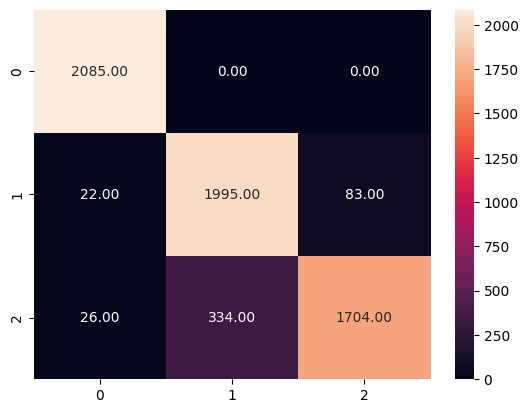

In [78]:
sn.heatmap(confusion_matrix(Y_test,y_pred), annot=True, fmt='.2f')

### Saving the Pipeline

In [79]:
import pickle

pickle.dump(pipe, open('10 pipe.pkl', 'wb'))

### Prediction System

In [82]:
import numpy as np

def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day]])
    
    results = pipe.predict(features)
    return results

In [83]:
predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Serious Injury


C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Simple

---